### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

You can also download the dataset <a href = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">here </a>

***

### Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read IMDB Dataset

In [4]:
df=pd.read_csv('IMDB dataset.csv', nrows=10000,index_col=None)

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


### View descriptive stats

In [7]:
df.describe()

,review,sentiment
count,10000,10000
unique,9983,2
top,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
freq,2,5028


### Check for imbalanced data

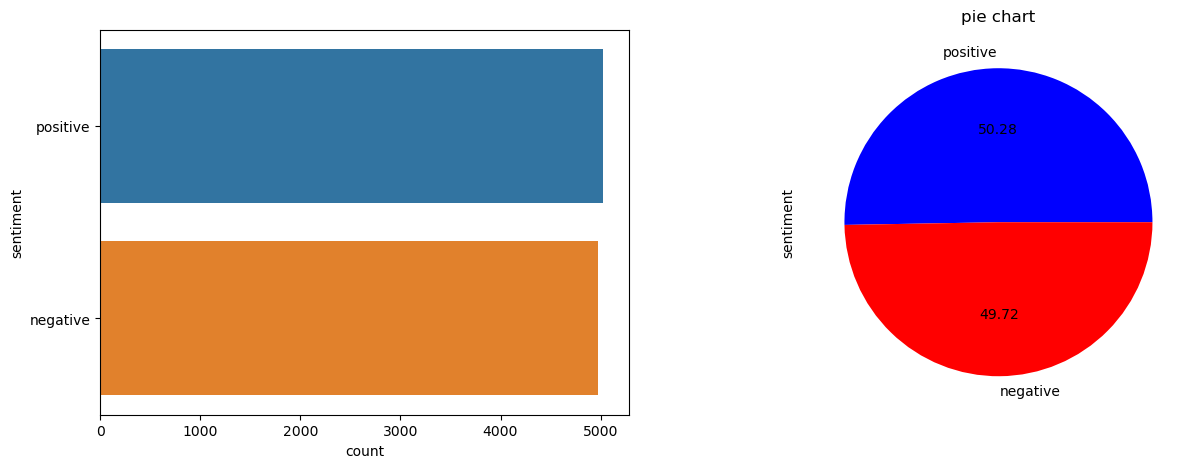

In [8]:
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df,y='sentiment',ax=ax[0])
plt.title("countplotof sentiment")
colors = ['#0000FF', '#FF0000']
df['sentiment'].value_counts().plot(kind="pie",colors=colors ,autopct="%.2f",ax=ax[1])
plt.title('pie chart')
plt.show()

### Create a function to Preprocess the review column

In [9]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [10]:
for i in range(5):
    print(df['review'][i])
    print()

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

### Print some text after applying the function

In [13]:
df['review'] = df['review'].apply(preprocess)

In [14]:
for i in range(5):
    print(df['review'][i])
    print()

one reviewers mention watch 1 oz episode hook they right exactly happen br br the first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid this show pull punch regard drug sex violence its hardcore classic use word br br it call oz nickname give oswald maximum security state penitentary it focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffle death star dodgy deal shady agreements never far away br br i would say main appeal show due fact go show dare forget pretty picture paint mainstream audiences forget charm forget romance oz mess around the first episode i ever saw strike nasty surreal i say i ready i watch i develop taste oz get accustom high level graphic violence not violence injustice crook guard sell nickel inmates kill order get away well mannered middle class inmates turn prison bitch due l

### Split the dataset into Input (X) & Target (y) variable

In [15]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [16]:
x=df['review']
y=df['sentiment']

### Convert y variable values into 0 and 1 from positive and negative

In [17]:
def senti(x):
    if x=='positive':
        return 1
    else:
        return 0

In [18]:
y = df['sentiment'].apply(senti)

In [19]:
y

0       1
1       1
2       1
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    1
Name: sentiment, Length: 10000, dtype: int64

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [20]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
tokenizer = Tokenizer(num_words=5000)

### Split the dataset into Training & Testing set

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

### Create keras Sequential Model with LSTM Layers

In [23]:
from keras import Sequential
from keras import layers

In [24]:
vocab_size = len(tokenizer.word_index) + 1

In [25]:
tokenizer

In [26]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=256)    
       
    return padded_sequence

In [27]:
x_train = text_encoding(x_train)
x_test = text_encoding(x_test)

In [28]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
x_train=np.array(x_train,dtype=np.float32)

In [30]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
vocab_size

1

In [32]:
model = Sequential()

### Embedding layer
model.add(layers.Embedding(vocab_size, 256))

### Lstm layer
### return_sequences: Whether to return the last output in the output sequence, or the full sequence.
model.add(layers.LSTM(128,  return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         256       
                                                                 
 lstm (LSTM)                 (None, None, 128)         197120    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5

### Compile the model

In [34]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Train the model with our training set

In [35]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
238/238 [==============================] - 78s 311ms/step - loss: 0.6929 - accuracy: 0.5080 - val_loss: 0.6971 - val_accuracy: 0.4875
Epoch 2/10
238/238 [==============================] - 82s 346ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.4875
Epoch 3/10
238/238 [==============================] - 83s 348ms/step - loss: 0.6934 - accuracy: 0.5028 - val_loss: 0.6942 - val_accuracy: 0.4875
Epoch 4/10
238/238 [==============================] - 91s 381ms/step - loss: 0.6934 - accuracy: 0.5037 - val_loss: 0.6931 - val_accuracy: 0.5125
Epoch 5/10
238/238 [==============================] - 91s 384ms/step - loss: 0.6933 - accuracy: 0.4996 - val_loss: 0.6940 - val_accuracy: 0.4875
Epoch 6/10
238/238 [==============================] - 88s 371ms/step - loss: 0.6933 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.4875
Epoch 7/10
238/238 [==============================] - 90s 376ms/step - loss: 0.6933 - accuracy: 0.5032 - val_loss: 0.6933 - val_ac

### Make prediction with X_test

In [36]:
y_pred=model.predict(x_test)

63/63 [==============================] - 7s 104ms/step


### Convert to 0 and 1 with higher probability towards 1

In [37]:
y_pred=[1 if i > 0.5 else 0 for i in y_pred]

### Evaluate the model

In [38]:
model.evaluate(x_train,y_train)

250/250 [==============================] - 26s 102ms/step - loss: 0.6931 - accuracy: 0.5055


[0.6930873990058899, 0.5055000185966492]

### Check accuracy score

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
accuracy_score(y_test,y_pred)

0.492

### Check confusion matrix

<AxesSubplot:>

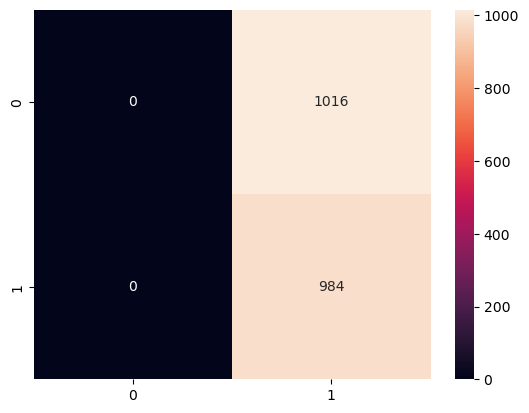

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Print Classification report

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1016
           1       0.49      1.00      0.66       984

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.24      0.49      0.32      2000



C:\Users\gokul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***